# Demos

In [1]:
%matplotlib inline
import rhetoric
import os
import pandas as pd

Churchill Beaches
Churchill FinestHour
FDR PearlHarbor
Henry LibertyDeath
Lincoln Gettysburg
Pericles Sepulcher
Urban Infidels
WillConq BeYe
Wilson SafeDem


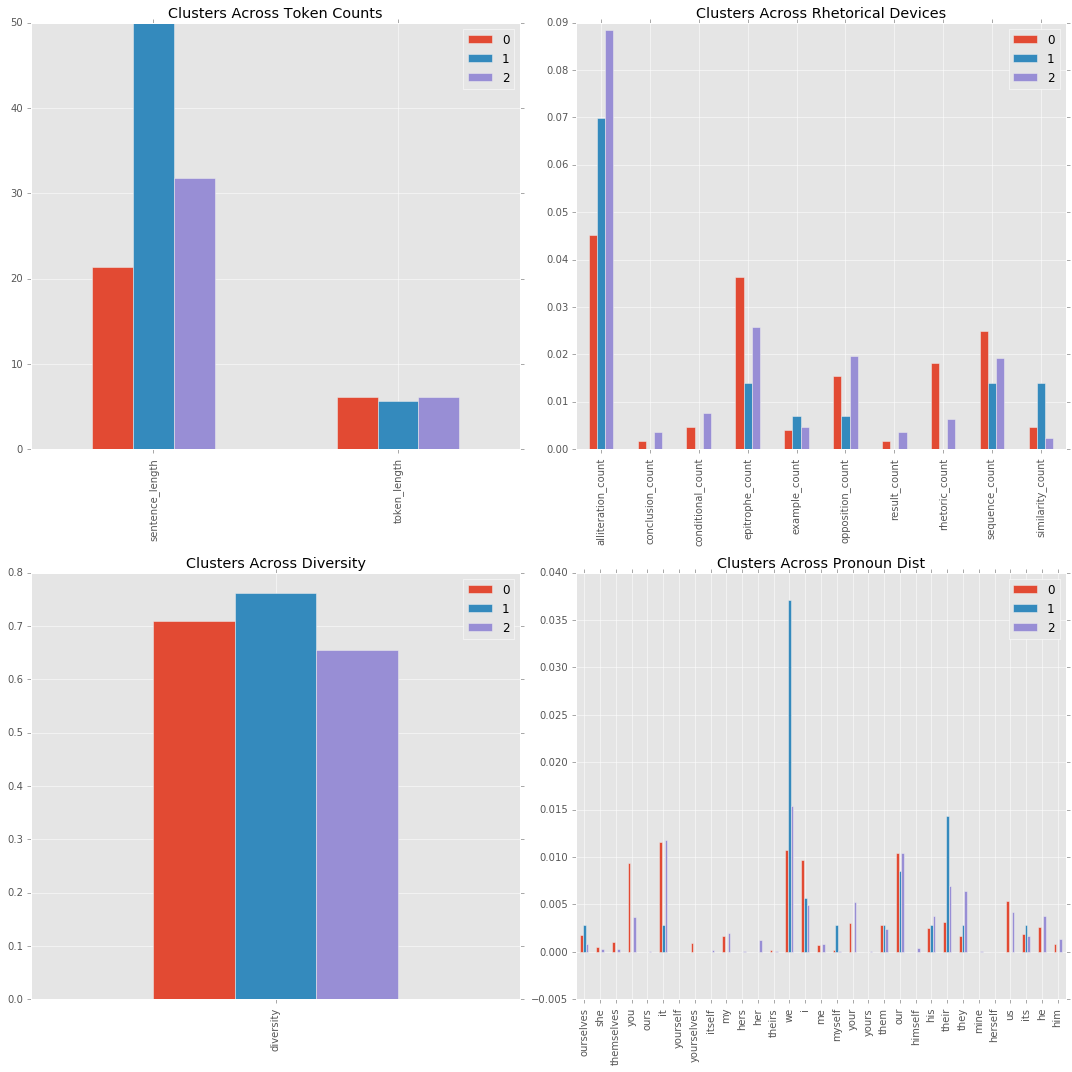

In [2]:
speech_meta = ['speaker','name']
speech_metrics = []
for fn in os.listdir('speeches/CallToWar/'):
    if fn.endswith('.txt'):
        speaker,name=fn.rstrip('.txt').split('-')
        print(speaker,name)
        fp = 'speeches/CallToWar/' + fn
        text = open(fp).read().lower()
        metrics = rhetoric.evaluate_speech(text)
        metrics['name'] = name
        metrics['speaker'] = speaker
        speech_metrics.append(metrics)
metrics_df = pd.DataFrame(speech_metrics)

groups = {'Rhetorical Devices':rhetoric.devices_cols, 'Token Counts':rhetoric.counts_cols, 
          'Pronoun Dist':rhetoric.pronoun_cols, 'Diversity': rhetoric.other_dist}
war_clusters = rhetoric.cluster_speeches(metrics_df, rhetoric.devices_cols+rhetoric.counts_cols+
                                         rhetoric.pronoun_cols + rhetoric.other_dist, ['speaker','name'], 3, groups)

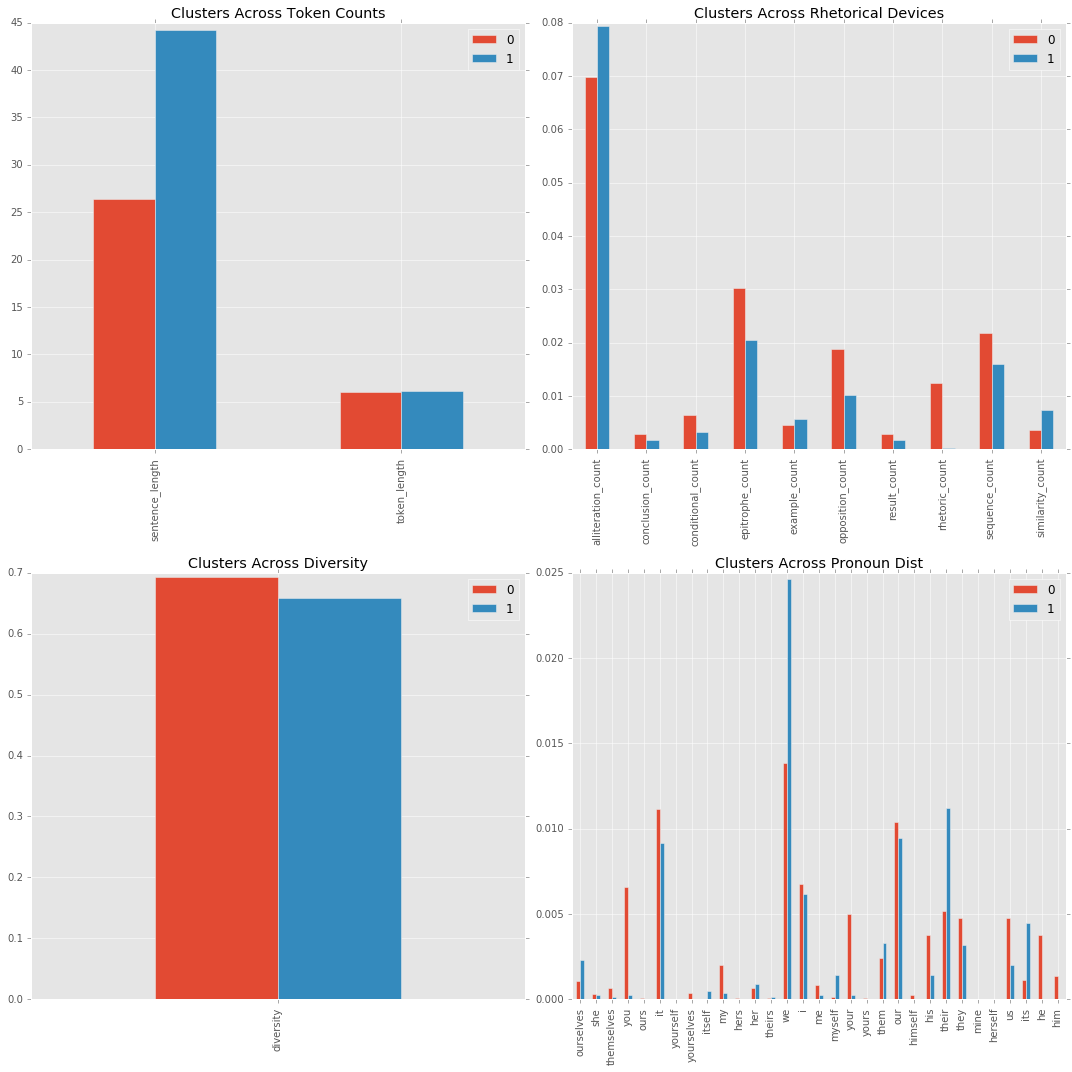

In [3]:
war_clusters_2 = rhetoric.cluster_speeches(metrics_df, rhetoric.devices_cols+rhetoric.counts_cols+
                                           rhetoric.pronoun_cols + rhetoric.other_dist, ['speaker','name'], 2, groups)

In [ ]:
inaugural_speech_metrics = []
for fn in os.listdir('speeches/PresidentialNom/'):
    if fn.endswith('.txt'):
        party,speaker,year=fn.rstrip('.txt').split('-')
        print(party,speaker,year)
        fp = 'speeches/PresidentialNom/' + fn
        text = open(fp).read().lower()
        metrics = rhetoric.evaluate_speech(text)
        metrics['party'] = party
        metrics['speaker'] = speaker
        metrics['year'] = year
        inaugural_speech_metrics.append(metrics)
inaugural_metrics_df = pd.DataFrame(inaugural_speech_metrics)

Dem Carter 1976
Dem Carter 1980
Dem Clinton 1992
Dem Clinton 1996
Dem Dukakis 1988
Dem Gore 2000
Dem Humphrey 1968
Dem Johnson 1964
Dem Kennedy 1960
Dem Kerry 2004
Dem

In [ ]:
inaugural_metrics_df.to_csv('data/presidential_metrics.csv')

In [ ]:
inaugural_metrics_df.head()

In [ ]:
inaugural_clusters = rhetoric.cluster_speeches(inaugural_metrics_df, rhetoric.devices_cols+rhetoric.counts_cols+
                                         rhetoric.pronoun_cols + rhetoric.other_dist, ['party','speaker', 'year'], 2, groups)

In [ ]:
inaugural_clusters[0].groupby(['party','cluster']).size().to_frame()

In [ ]:
inaugural_clusters[0][inaugural_clusters[0].cluster == 1]

In [ ]:
all_speakers = inaugural_metrics_df['speaker'].tolist()
def second_term(row):
    speaker = row['speaker']
    if all_speakers.count(speaker) == 2:
        this_year = row['year']
        reelect_year = inaugural_metrics_df[inaugural_metrics_df.speaker==row['speaker']]['year'].max()
        if this_year == reelect_year:
            return True
    return False

inaugural_metrics_df['reelection'] = inaugural_metrics_df.apply(second_term, axis=1)

In [ ]:
inaugural_clusters = rhetoric.cluster_speeches(inaugural_metrics_df, rhetoric.devices_cols+rhetoric.counts_cols+
                                         rhetoric.pronoun_cols + rhetoric.other_dist, ['party','speaker', 'year', 'reelection'], 2, groups)

In [ ]:
inaugural_clusters[0].groupby(['reelection','cluster']).size().to_frame()

In [ ]:
def plot_device_over_time(df, column):
    

In [ ]:
inagu